In [15]:
import numpy as np

import matplotlib.pyplot as plt
from math import cos, sin, atan

%matplotlib inline


**1. Feedforward: Building a ReLU neural network**

1. Draw a network with:
- inputs
- 1 hidden layers with 4 hidden units and a
- 1-class output (for binary classification)

In [16]:
## Reference from Stackoverflow https://stackoverflow.com/a/37366154/10404826
class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = plt.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        plt.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = plt.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        plt.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            plt.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            plt.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            plt.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

            
class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        plt.figure()
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        plt.axis('scaled')
        plt.axis('off')
        plt.title( 'Neural Network architecture', fontsize=15 )
        plt.show()

        
class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()


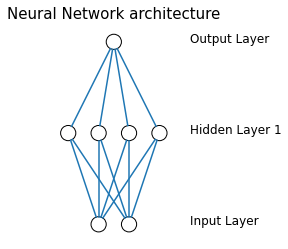

In [17]:
network = DrawNN( [2,4,1] )
network.draw()

2. Write out the mathematical equation for the output of this network (feel
free to break the input-output relationship into multiple equations).

$$\hat{y} = sigmoid(Relu(\vec{x}W + \vec{b})+ \vec{c})$$

3. Write out the forward-pass function in python, call it ff nn ReLu(...)

In [19]:
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ff_nn_ReLu(x, W, b, V, c):
    a1 = x.dot(W) + b
    h = relu(a1)
    a2 = h.dot(V) + c
    out = np.round(sigmoid(a2), 2)
    return out

W = np.array([[1., -1., 0, 1.], [0, 0, .5, 1.]])
b = np.array([0, 0, 1., 0]).T
V = np.array([[1.], [0], [-1.], [1.]])
c = np.array([1.])

X = np.array([[1.,-1.], [0, -1.], [0, 1.]])

ff_nn_ReLu(X, W, b, V, c)


array([[0.82],
       [0.62],
       [0.62]])

4. what are the class probabilities associated with the forward pass of each
sample?

> Suppose that we have the 3 class with 0, 1, 2.

> Class 0 for Input [1, -1] with probability 0.82.

> Class 1 for Input [0, -1] with probability 0.62.

> Class 2 for Input [0 ,1] with probability 0.62.






**2. Gradient Descent**

Consider a simple non-convex function of two variables:

$$f(x,y) = (3-x^3) + 50*(2y^2 -x)^2 $$

1. What are the partial derivatives of f with respect to x and to y?
$$\frac{\partial}{\partial x} = -3x^2-100(2y^2-x)$$

$$\frac{\partial}{\partial y} = 400y(2y^2-x)$$

2. Create a visualization of the contours of this function.

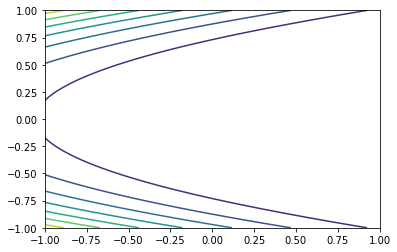

In [20]:
x = np.linspace(-1.0, 1.0, 300)
y = np.linspace(-1.0, 1.0, 300)
X, Y = np.meshgrid(x, y)

Z = (3-pow(X,3))+50*pow((2*pow(Y,2)-X),2)
fig, ax = plt.subplots()
ax.contour(X, Y, Z)
plt.show()

3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [21]:
def f(x,y):
    return 3-pow(X,3)+50*pow((2*pow(Y,2)-X),2)
def f_x(x,y):
    return -3*pow(x,2)-100*(2*pow(y,2)-x)
def f_y(x,y):
    return 400*y*(2*pow(y,2)-x)
def grad_descent(starting, learning_rate):
    betas = starting
    trajectory = [betas]
    
    for i in range(5):
        grad = np.array([f_x(betas[0], betas[1]),f_y(betas[0],betas[1])])
        betas = betas - learning_rate * grad
        trajectory.append(betas)
        
    return np.array(trajectory)


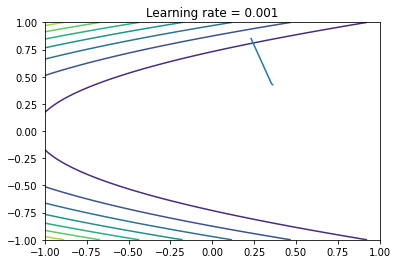

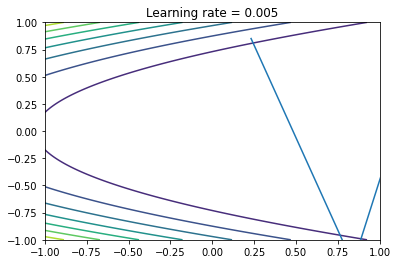

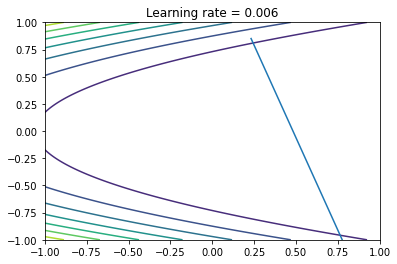

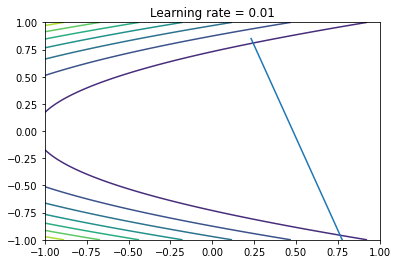

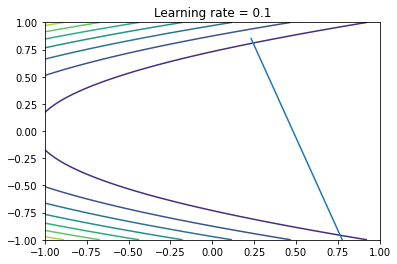

In [22]:
def visualize(points, learning_rate):
    np.random.seed(2115)
    xlist = np.linspace(-1.0, 1.0, 300)
    ylist = np.linspace(-1.0, 1.0, 300)
    X, Y = np.meshgrid(xlist, ylist)
    Z = (3-pow(X,3))+50*pow((2*pow(Y,2)-X),2)
    fig, ax = plt.subplots()
    ax.set_xlim(-1,1)
    ax.set_ylim(-1, 1)
    ax.contour(X, Y, Z)
    betas = grad_descent(points, learning_rate)
    xs = betas[:,0]
    ys = betas[:,1]
    plt.title('Learning rate = '+ str(learning_rate))
    plt.plot(xs,ys)


points=np.random.uniform(-1,1,size=2)
visualize(points, 0.001)
visualize(points, 0.005)
visualize(points, 0.006)
visualize(points, 0.01)
visualize(points, 0.1)

4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s
hyperparameters.


In [23]:
def grad_descent_w_momentum(starting, learning_rate, alpha):
    betas = starting
    trajectory = [betas]
    velocity=np.array([0,0])
    
    for i in range(5):
        grad = np.array([f_x(betas[0], betas[1]),f_y(betas[0],betas[1])])
        betas = betas - learning_rate * grad + alpha*velocity
        trajectory.append(betas)
        velocity=grad
        
    return np.array(trajectory)

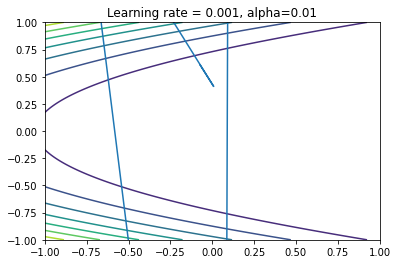

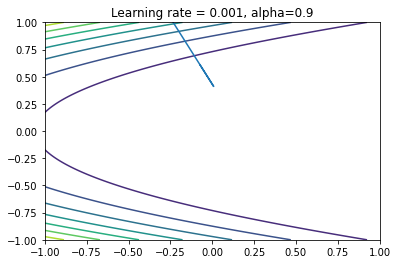

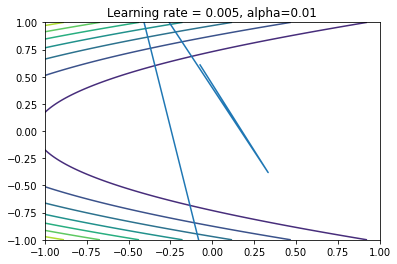

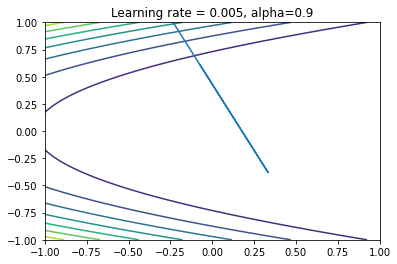

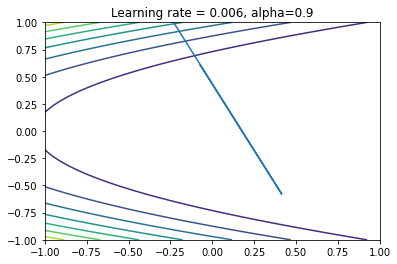

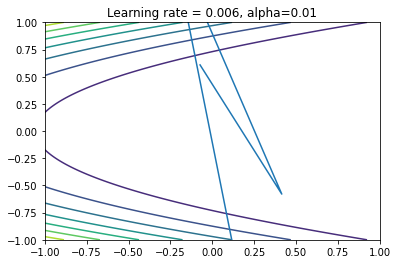

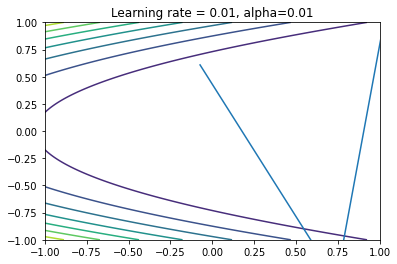

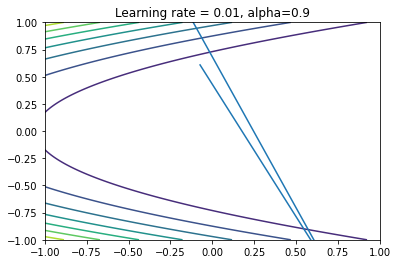

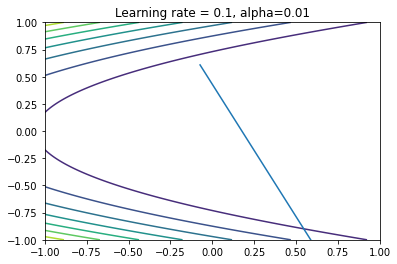

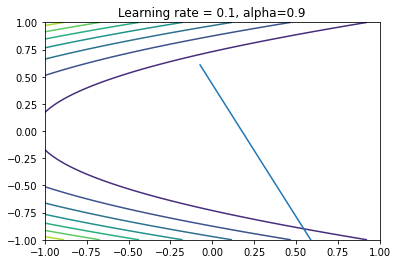

In [25]:
def visualize(points, learning_rate, alpha):
    np.random.seed(2115)
    x = np.linspace(-1.0, 1.0, 300)
    y = np.linspace(-1.0, 1.0, 300)
    X, Y = np.meshgrid(x, y)
    Z = (3-pow(X,3))+50*pow((2*pow(Y,2)-X),2)
    fig, ax = plt.subplots()
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.contour(X, Y, Z)
    betas = grad_descent_w_momentum(points, learning_rate, alpha)
    xs = betas[:,0]
    ys = betas[:,1]
    plt.title('Learning rate = '+ str(learning_rate)+', alpha='+str(alpha))
    plt.plot(xs,ys)


points=np.random.uniform(-1,1,size=2)
visualize(points, 0.001, 0.01)
visualize(points, 0.001, 0.9)
visualize(points, 0.005, 0.01)
visualize(points, 0.005, 0.9)
visualize(points, 0.006, 0.9)
visualize(points, 0.006, 0.01)
visualize(points, 0.01, 0.01)
visualize(points, 0.01, 0.9)
visualize(points, 0.1,0.01)
visualize(points, 0.1, 0.9)


**3. Backprop**

1. For the same network as in Question 1, derive expressions of the gradient
of the Loss function with respect to each of the model parameters.

$$\frac{\partial L}{\partial V} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial out}\frac{\partial out}{\partial V} = \sum_{i=1}^{n}(\frac{y}{\hat{y}}- \frac{1-y}{1-\hat{y}})\sigma'(out)h_i$$
$$\frac{\partial L}{\partial c} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial out}\frac{\partial out}{\partial c} = (\frac{y}{\hat{y}}- \frac{1-y}{1-\hat{y}})\sigma'(out)$$
$$\frac{\partial L}{\partial W} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial out}\frac{\partial out}{\partial H}\frac{\partial h_1}{\partial out'}\frac{\partial out'}{\partial W} = \sum_{i=1}^{n}\sum_{j=1}^{m}(\frac{y}{\hat{y}}- \frac{1-y}{1-\hat{y}})\sigma'(out)v_iReLU'(out_i')x_j$$
$$\frac{\partial L}{\partial B} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial out}\frac{\partial out}{\partial H}\frac{\partial h_1}{\partial out'}\frac{\partial out'}{\partial B} = \sum_{i=1}^{n}(\frac{y}{\hat{y}}- \frac{1-y}{1-\hat{y}})\sigma'(out)v_iReLU'(out_i')$$


2. Write a function grad f(...) that takes in a weights vector and returns
the gradient of the Loss at that location.

In [40]:
def relu(x):
    return np.where(x > 0, x, 0)
        
def relu_d(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
def sigmoid_d(x):
    return sigmoid(x) * (1-sigmoid(x))

def loss_function(y, y_hat):
    return y/y_hat + (1-y)/(1-y_hat)

def yhat(x, params):
    W, V, b, c = params
    h = relu(np.dot(x, W) + b)
    y = sigmoid(np.dot(h, V) + c)
    return y

def grad_f(X, Y, W, V, b, c):
    y = Y
    input = np.array(np.dot(X, W) + b)
    h = relu(input)
    y_hat = sigmoid(np.dot(h, V) + c)
    dL_dc = (y_hat-y).sum()
    dL_dv = np.dot(h.T, y_hat - y)
    dL_db = (np.dot(y_hat - y, V.T) * relu_d(input)).sum(axis=0)
    dL_dw = np.dot(X.T, np.dot(y_hat-y, V.T)*relu_d(input))   
    
    return (dL_dw, dL_dv, dL_db, dL_dc)


3. Generate a synthetic dataset like the XOR pattern (see below).

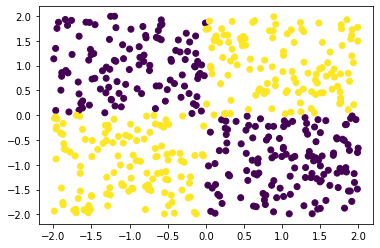

In [31]:
x_xor = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y_xor = np.zeros((500,1))
y_xor[np.logical_and(x_xor[:,0]>0 , x_xor[:,1]>0)]=1
y_xor[np.logical_and(x_xor[:,0]<0 , x_xor[:,1]<0)]=1
plt.scatter(x_xor[:,0],x_xor[:,1],c=y_xor)
plt.show()

4. Fit your network using Gradient Descent. Keep track of the total Loss at
each iteration and plot the result.

In [32]:
x = x_xor
y = y_xor
W = np.array([[1., -1., 0, 1.], [0, 0, .5, 1.]])
b = np.array([0, 0, 1., 0]).T
V = np.array([[1.], [0], [-1.], [1.]])
c = np.array([1])

loss = []

alpha = 0.001
    
for i in range(100):
    gradient = grad_f(x, y, W, V, b, c)
    
    dLdW, dLdV, dLdb, dLdc = gradient
    
    W = W - alpha * dLdW
    b = b - alpha * dLdb
    V = V - alpha * dLdV
    c = c - alpha * dLdc
    xw = np.dot(x, W) + b
    xw[xw < 0] = 0
    output  = np.dot(xw, V) + c
    y_hat = 1. / (1 + np.exp(-output))
    
    loss.append(- sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))


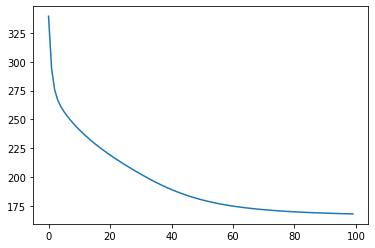

In [33]:
plt.plot(range(0,100), loss)
plt.show()


5. Repeat the exercise above using Momentum. Comment on whether your
algorithm seems to converge more efficiently.

In [34]:
x = x_xor
y = y_xor
W = np.array([[1., -1., 0, 1.], [0, 0, .5, 1.]])
b = np.array([0, 0, 1., 0]).T
V = np.array([[1.], [0], [-1.], [1.]])
c = np.array([1])
vs = np.zeros(x.size)
params = (W, V, b, c)

trajectory = []
loss = []

alpha = 0.0001
epsilon = 0.0001

for i in range(1000):    
    gradients = grad_f(x, y, W, V, b, c)
    new_params = []  
    for (i, m, v) in zip(params, gradients, vs):
        new_params.append(i - epsilon * m - alpha * v)
        
    vs = gradients
    params = tuple(new_params)
    
    W, V, b, c = params
    
    h = relu(np.dot(x, W) + b)
    y_hat = sigmoid(np.dot(h, V) + c)
    
    trajectory.append(params)
    loss.append(- sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))


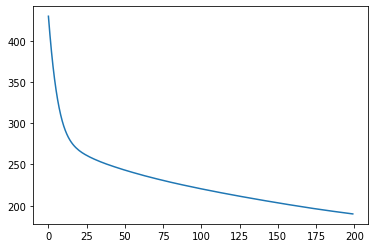

In [35]:
plt.plot(range(0,200), loss[0:200])
plt.show()


6. Plot a visualization of the final decision boundary that your model has
learned. Overlay the datapoints in this plot.

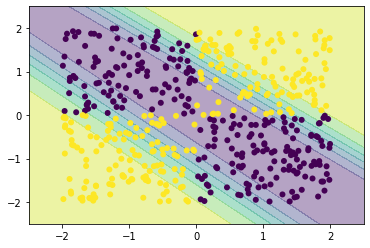

In [41]:
x1 = np.linspace(-2.5, 2.5, 1000)
x2 = np.linspace(-2.5, 2.5, 1000)
X1, X2 = np.meshgrid(x1, x2)
YHAT = yhat(np.c_[X1.ravel(), X2.ravel()], trajectory[-1])
z = YHAT.reshape(X1.shape)
fig, ax = plt.subplots()
ax.contourf(X1, X2, z, alpha=0.4)
ax.scatter(x[:,0],x[:,1], c=y[:,0], lw=0)
plt.show()
